# Credit Card Fraud Detection

First import packages and datasets. Do data pre-processing and than data visualization for understanding our dataset. Next step is model building but before model building we have to do feature selections for our model's better performance.

Import Packages and Dataset

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
import warnings
# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [61]:
card=pd.read_csv('card_transdata.csv')
card.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [62]:
card.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


## Data Preprocessing

In [63]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [64]:
card.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


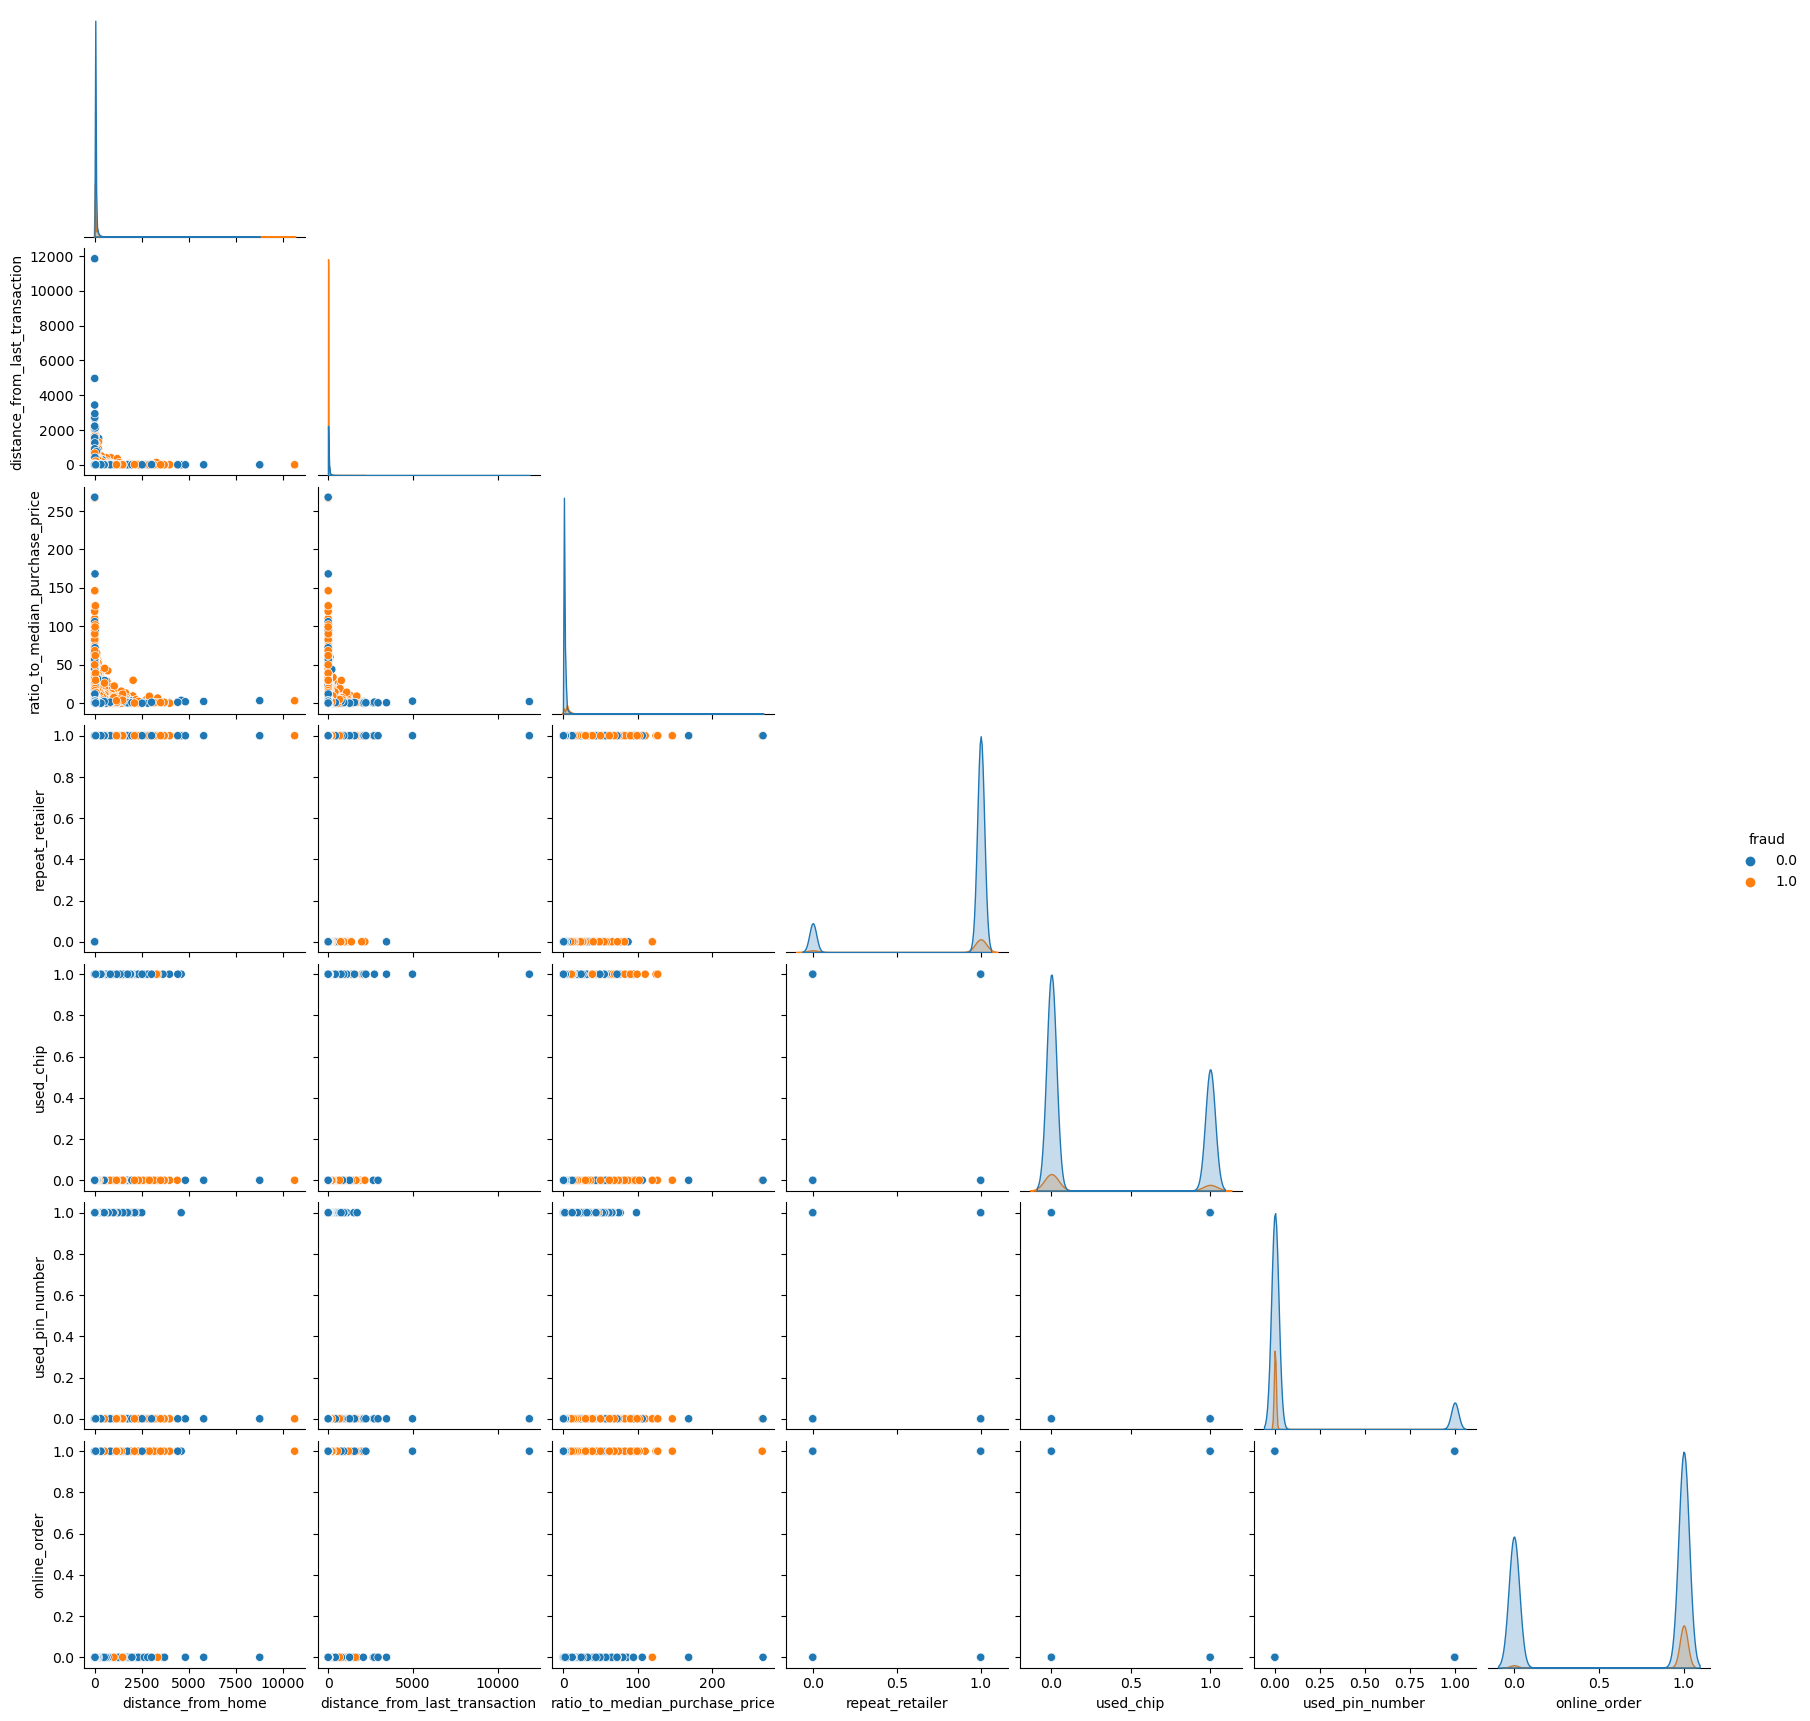

In [8]:
sns.pairplot(card, hue='fraud',corner=True)
plt.show()

In [65]:
card.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

## Removing outlier using Percentile Method

<Figure size 1000x500 with 0 Axes>

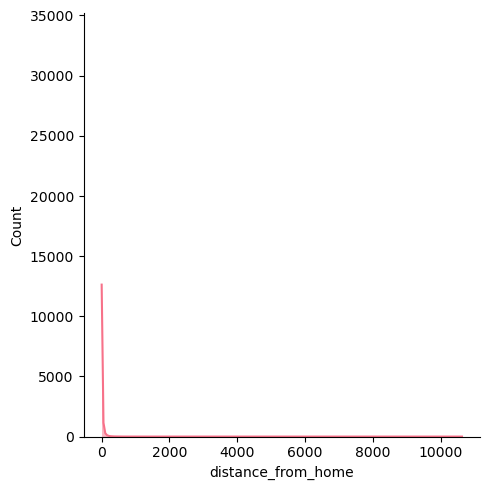

In [116]:
sns.set_palette("husl")
plt.figure(figsize=(10,5))
sns.displot(x=card["distance_from_home"],kde=True)
plt.show()

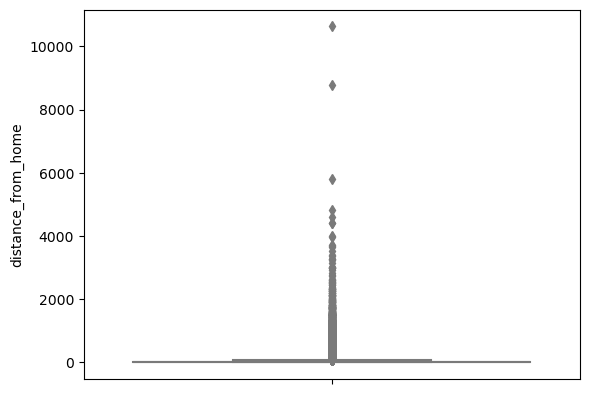

In [117]:
sns.boxplot(y=card["distance_from_home"], palette="pastel")
plt.show()

In [118]:
max_thres = card["distance_from_home"].quantile(0.95) # Datapoint which is  95% Quantile
# Anything above this value (99.70863) is considered as outlier
max_thres

99.70863798526938

In [119]:
card[card["distance_from_home"]>max_thres]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
12,765.282559,0.371562,0.551245,1.0,1.0,0.0,0.0,0.0
15,179.665148,0.120920,0.535640,1.0,1.0,1.0,1.0,0.0
16,114.519789,0.707003,0.516990,1.0,0.0,0.0,0.0,0.0
37,202.757442,0.275015,0.775549,1.0,0.0,1.0,1.0,0.0
54,151.370437,5.340081,1.171567,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999924,108.428315,0.050380,0.595808,1.0,0.0,0.0,0.0,0.0
999941,142.526517,0.224511,0.368224,1.0,1.0,0.0,1.0,0.0


In [120]:
min_thres = card["distance_from_home"].quantile(0.05) # Datapoint which is  5% Quantile
# Anything below this value (0.9976) is considered as outlier
min_thres

0.9976546291548255

In [121]:
card[card["distance_from_home"]>min_thres]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [122]:
card[card["distance_from_home"]<max_thres]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [127]:
card_p_col1 = card[(card.distance_from_home<max_thres) & (card.distance_from_home>min_thres)]
print(card_p.shape)
card_p_col1.head()

(900000, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


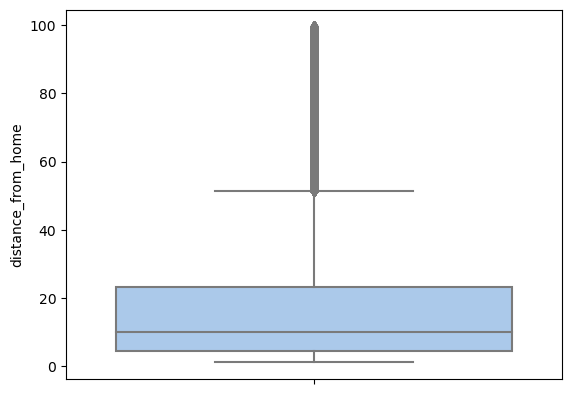

In [124]:
sns.boxplot(y=card_p_col1["distance_from_home"], palette="pastel")
plt.show()

<Figure size 1000x500 with 0 Axes>

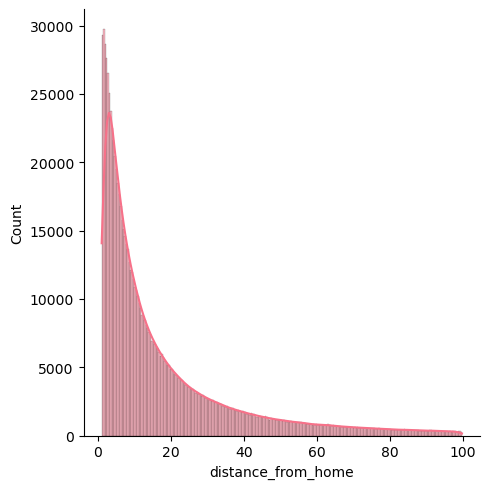

In [125]:
sns.set_palette("husl")
plt.figure(figsize=(10,5))
sns.displot(x=card_p_col1["distance_from_home"],kde=True)
plt.show()

## Removing outlier using Standard Deviation Method

In [76]:
card.distance_from_home.mean()

26.62879219257128

In [77]:
card.distance_from_home.std()

65.3907843990436

While removing outliers using Standard Deviation is remove any data points that are beyond 1 sd(68%) or 2sd(95%) or 3sd(99.7) from mean Lets remove data points that are beyond 3 standard deviation from mean for which we have to set upper limit and lower limit.

In [78]:
upper_limit = card.distance_from_home.mean() + 3*card.distance_from_home.std()
upper_limit

222.80114538970207

In [79]:
lower_limit = card.distance_from_home.mean() - 3*card.distance_from_home.std()
lower_limit

-169.54356100455954

In [80]:
# Lets see the Outliers
card[(card.distance_from_home<upper_limit) | (card.distance_from_home>lower_limit)]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [81]:
card_std = card[(card.distance_from_home<upper_limit) & (card.distance_from_home>lower_limit)]
card_std.shape

(986676, 8)

<Figure size 1000x500 with 0 Axes>

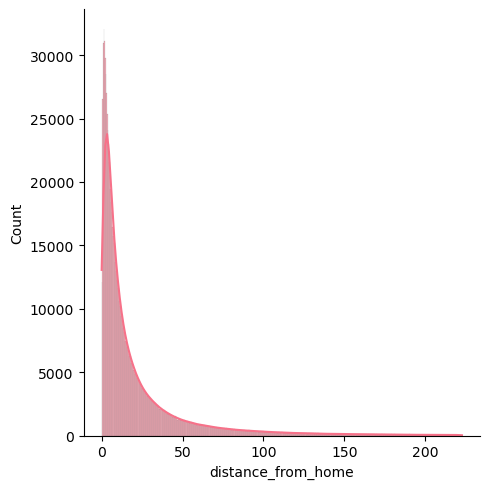

In [82]:
sns.set_palette("husl")
plt.figure(figsize=(10,5))
sns.displot(x=card_std["distance_from_home"],kde=True)
plt.show()

### Using percentile method to remove outlier is better option tha using standard deviation method

<Figure size 1000x500 with 0 Axes>

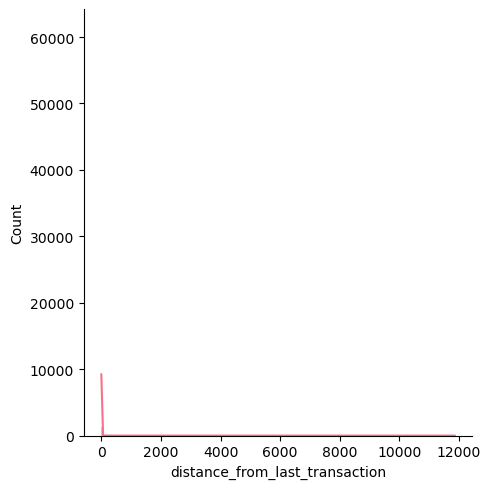

In [83]:
sns.set_palette("husl")
plt.figure(figsize=(10,5))
sns.displot(x=card["distance_from_last_transaction"],kde=True)
plt.show()

In [100]:
max_thres = card["distance_from_last_transaction"].quantile(0.95) # Datapoint which is  95% Quantile
# Anything above this value (19.1705) is considered as outlier
max_thres


19.170548708164894

In [101]:
min_thres = card["distance_from_last_transaction"].quantile(0.05) # Datapoint which is  5% Quantile
# Anything below this value (0.0513) is considered as outlier
min_thres

0.0513964326338636

In [102]:
card[card["distance_from_last_transaction"]>min_thres]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [103]:
card[card["distance_from_last_transaction"]<max_thres]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [104]:
card_p_col2 = card[(card.distance_from_last_transaction<max_thres) & (card.distance_from_last_transaction>min_thres)]
print(card_p.shape)
card_p_col2.head()

(900000, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


<Figure size 1000x500 with 0 Axes>

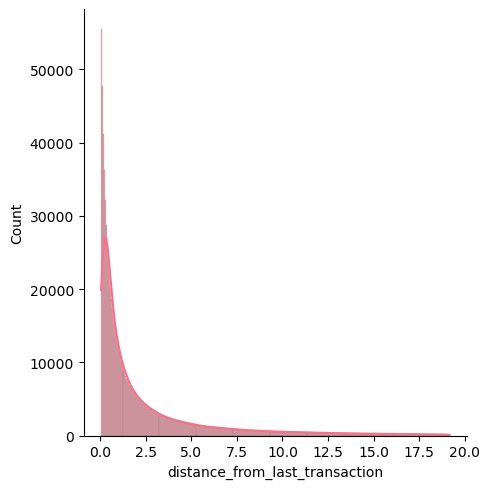

In [105]:
sns.set_palette("husl")
plt.figure(figsize=(10,5))
sns.displot(x=card_p_col2["distance_from_last_transaction"],kde=True)
plt.show()

##  ratio_to_median_purchase_price col

<Figure size 1000x500 with 0 Axes>

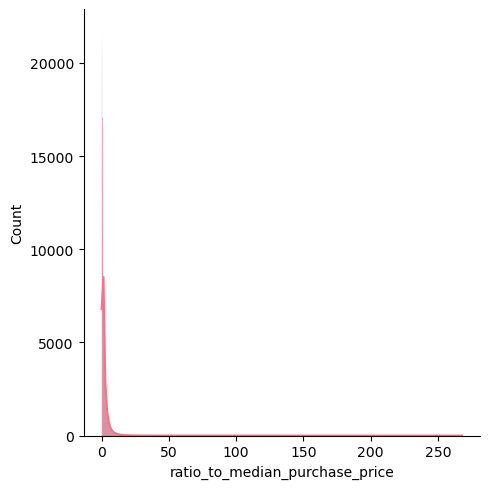

In [155]:
sns.set_palette("husl")
plt.figure(figsize=(10,5))
sns.displot(x=card["ratio_to_median_purchase_price"],kde=True)
plt.show()

In [156]:
max_thres = card["ratio_to_median_purchase_price"].quantile(0.95) # Datapoint which is  95% Quantile
# Anything above this value (6.0714) is considered as outlier
max_thres

6.0714248781058515

In [157]:
min_thres = card["ratio_to_median_purchase_price"].quantile(0.05) # Datapoint which is  5% Quantile
# Anything below this value (0.163933756) is considered as outlier
min_thres


0.16393375619203146

In [158]:
card[card["ratio_to_median_purchase_price"]>min_thres]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [159]:
card[card["ratio_to_median_purchase_price"]<max_thres]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [160]:
card_p_col3 = card[(card.ratio_to_median_purchase_price<max_thres) & (card.distance_from_home>min_thres)]
print(card_p.shape)
card_p.head()

(900000, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


<Figure size 1000x500 with 0 Axes>

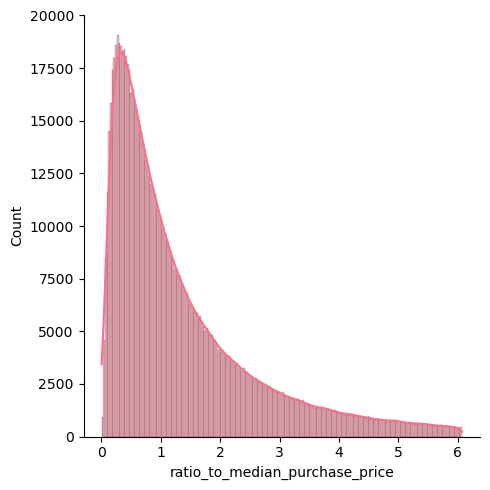

In [161]:
sns.set_palette("husl")
plt.figure(figsize=(10,5))
sns.displot(x=card_p_col3["ratio_to_median_purchase_price"],kde=True)
plt.show()

## Concat all the columns after removing outliers

In [162]:
# Concatenate the three columns horizontally
concatenated_cols = pd.concat([card_p_col1["distance_from_home"],
                               card_p_col2["distance_from_last_transaction"],
                               card_p_col3["ratio_to_median_purchase_price"]], axis=1)

# Concatenate the concatenated columns with the remaining columns of the card df
card_concatenated = pd.concat([card.drop(columns=["distance_from_home", "distance_from_last_transaction","ratio_to_median_purchase_price"]),
                               concatenated_cols], axis=1)
card_concatenated.head()

,repeat_retailer,used_chip,used_pin_number,online_order,fraud,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
0,1.0,1.0,0.0,0.0,0.0,57.877857,0.311140,1.945940
1,1.0,0.0,0.0,0.0,0.0,10.829943,0.175592,1.294219
2,1.0,0.0,0.0,1.0,0.0,5.091079,0.805153,0.427715
3,1.0,1.0,0.0,1.0,0.0,2.247564,5.600044,0.362663
4,1.0,1.0,0.0,1.0,0.0,44.190936,0.566486,2.222767


In [163]:
card_concatenated.isna().sum()

repeat_retailer                        0
used_chip                              0
used_pin_number                        0
online_order                           0
fraud                                  0
distance_from_home                100000
distance_from_last_transaction    100000
ratio_to_median_purchase_price     51553
dtype: int64

In [164]:
card_concatenated.dropna(subset=['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price'], inplace=True)
card_concatenated.shape

(769628, 8)

In [165]:
card_concatenated.head()

,repeat_retailer,used_chip,used_pin_number,online_order,fraud,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
0,1.0,1.0,0.0,0.0,0.0,57.877857,0.311140,1.945940
1,1.0,0.0,0.0,0.0,0.0,10.829943,0.175592,1.294219
2,1.0,0.0,0.0,1.0,0.0,5.091079,0.805153,0.427715
3,1.0,1.0,0.0,1.0,0.0,2.247564,5.600044,0.362663
4,1.0,1.0,0.0,1.0,0.0,44.190936,0.566486,2.222767


In [166]:
1000000 - 769628 # Count of rows removed after treating outlier

230372

## Data Visualization

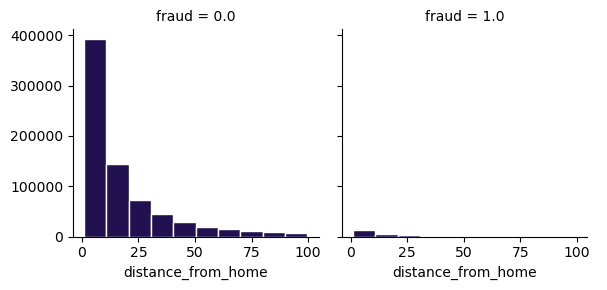

In [167]:
sns.set_palette('magma')
graph = sns.FacetGrid(card_concatenated, col ="fraud")
graph.map(plt.hist, "distance_from_home", edgecolor ="w").add_legend()

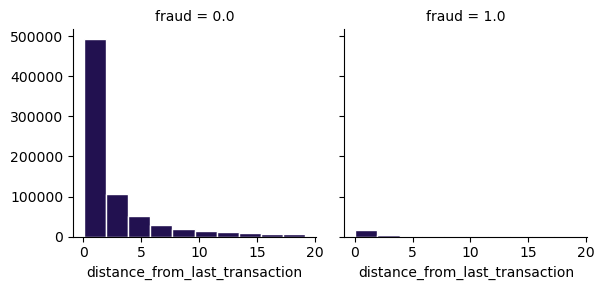

In [168]:
sns.set_palette('magma')
graph = sns.FacetGrid(card_concatenated, col ="fraud")
graph.map(plt.hist, "distance_from_last_transaction", edgecolor ="w").add_legend()

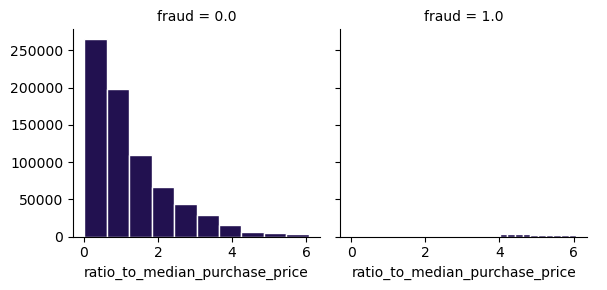

In [170]:
sns.set_palette('magma')
graph = sns.FacetGrid(card_concatenated, col ="fraud")
graph.map(plt.hist, "ratio_to_median_purchase_price", edgecolor ="w").add_legend()

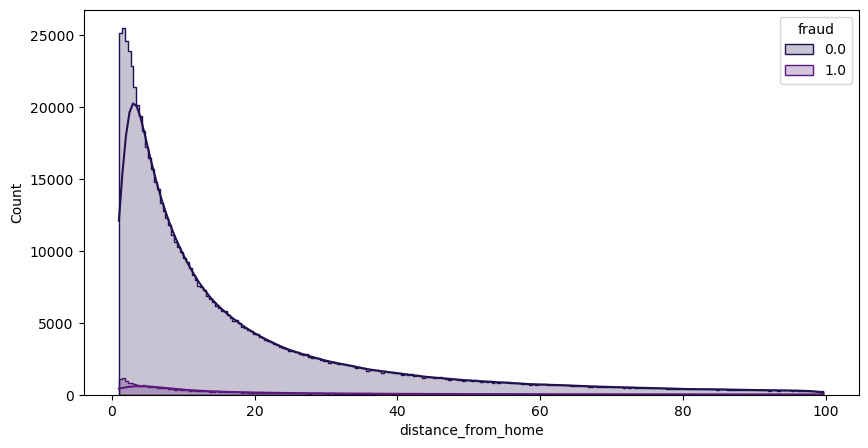

In [172]:
plt.figure(figsize=(10, 5))
sns.histplot(data=card_concatenated, x='distance_from_home', hue='fraud', element='step', kde=True, fill=True)
plt.show()

<Axes: xlabel='fraud', ylabel='distance_from_home'>

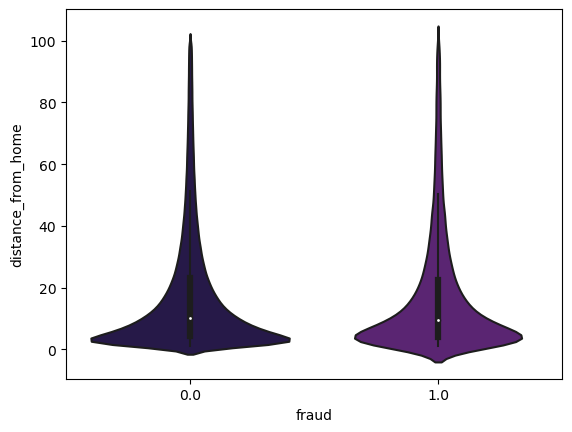

In [173]:
sns.violinplot(x="fraud", y="distance_from_home", data=card_concatenated)

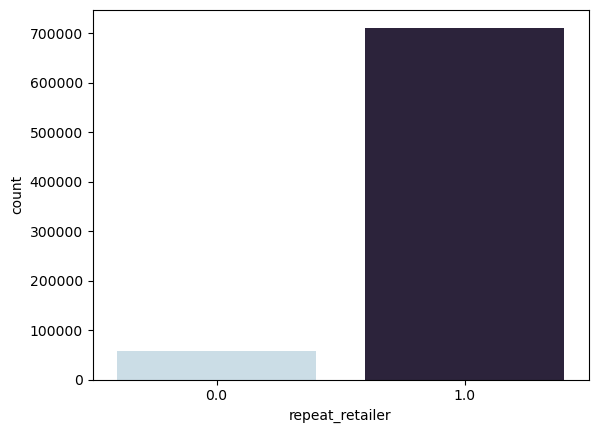

In [174]:
sns.countplot(data=card_concatenated,x='repeat_retailer',palette="ch:s=.25,rot=-.25")
plt.show()

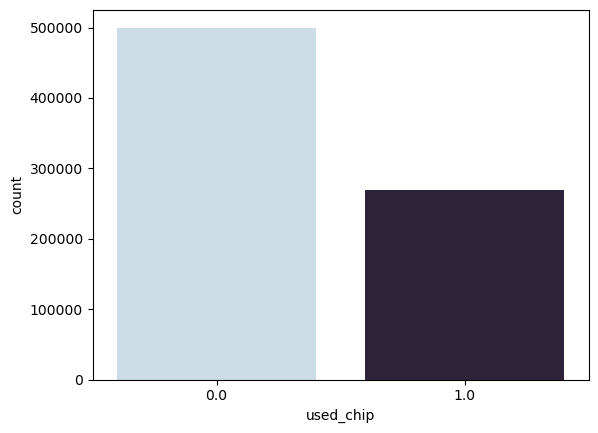

In [175]:
sns.countplot(data=card_concatenated,x='used_chip',palette="ch:s=.25,rot=-.25")
plt.show()

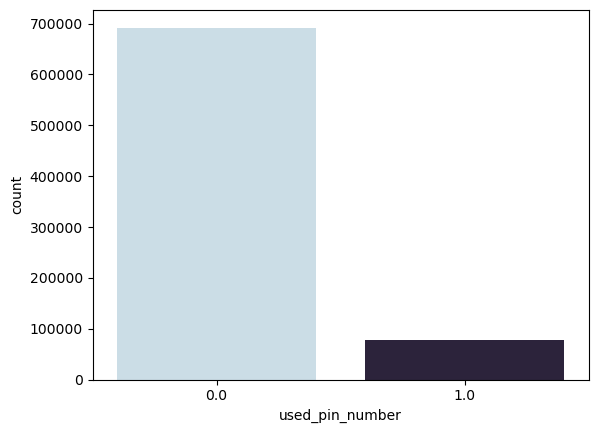

In [176]:
sns.countplot(data=card_concatenated,x='used_pin_number',palette="ch:s=.25,rot=-.25")
plt.show()

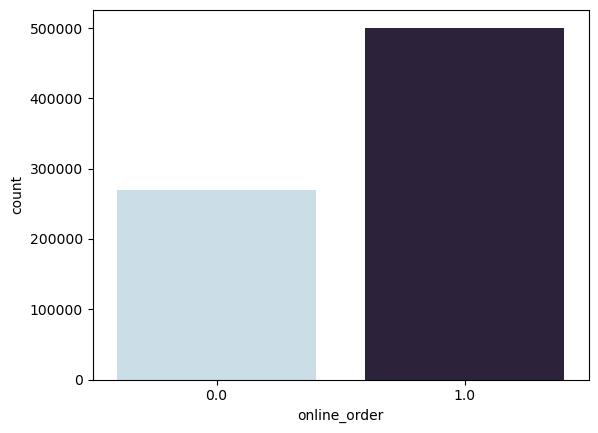

In [177]:
sns.countplot(data=card_concatenated,x='online_order',palette="ch:s=.25,rot=-.25")
plt.show()

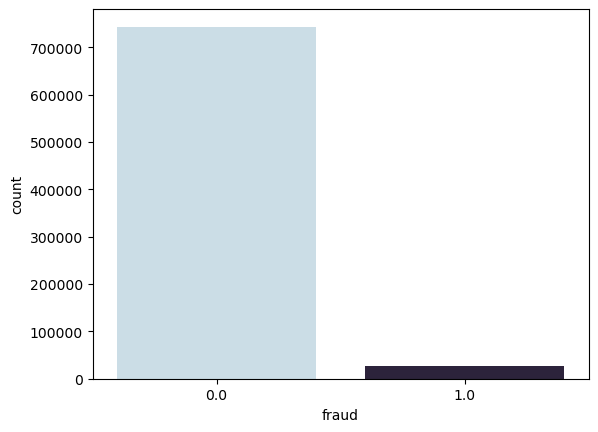

In [178]:
sns.countplot(data=card_concatenated,x='fraud',palette="ch:s=.25,rot=-.25")
plt.show()

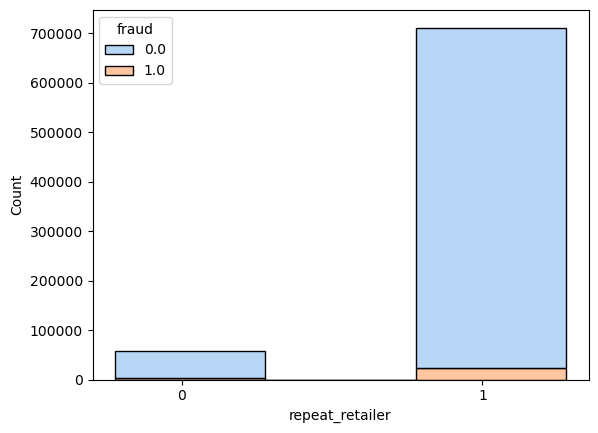

In [181]:
sns.histplot(binwidth=0.45, x="repeat_retailer", hue="fraud", data=card_concatenated, stat="count", multiple="stack", palette="pastel")
plt.xticks([0.2,1.1],['0','1'])
plt.show()

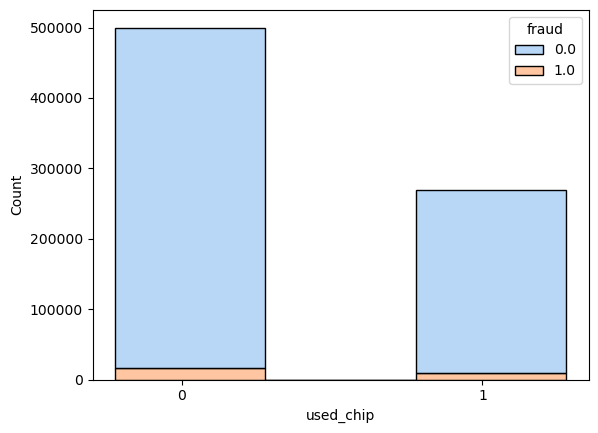

In [182]:
sns.histplot(binwidth=0.45, x='used_chip', hue="fraud", data=card_concatenated, stat="count", multiple="stack", palette="pastel")
plt.xticks([0.2,1.1],['0','1'])
plt.show()

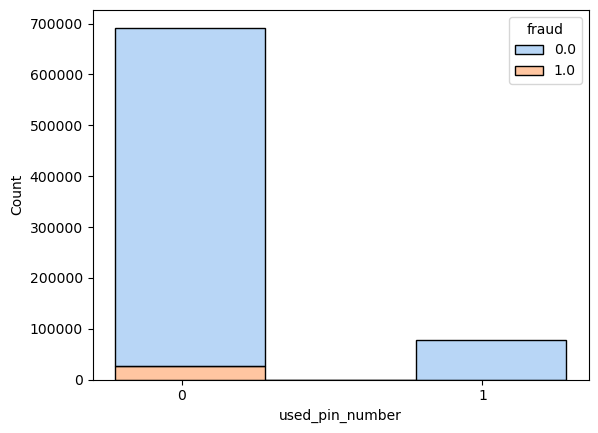

In [183]:
sns.histplot(binwidth=0.45, x='used_pin_number', hue="fraud", data=card_concatenated, stat="count", multiple="stack", palette="pastel")
plt.xticks([0.2,1.1],['0','1'])
plt.show()

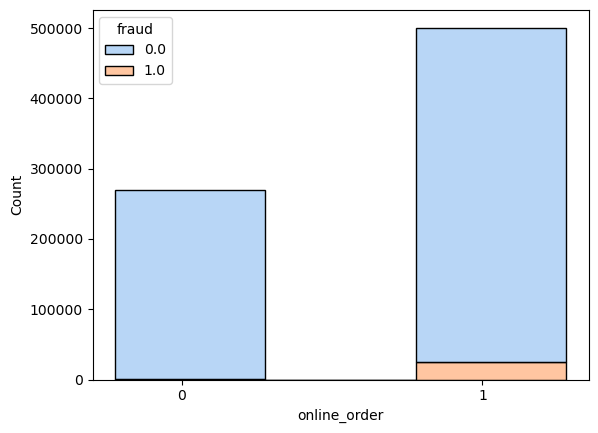

In [184]:
sns.histplot(binwidth=0.45, x='online_order', hue="fraud", data=card_concatenated, stat="count", multiple="stack", palette="pastel")
plt.xticks([0.2,1.1],['0','1'])
plt.show()

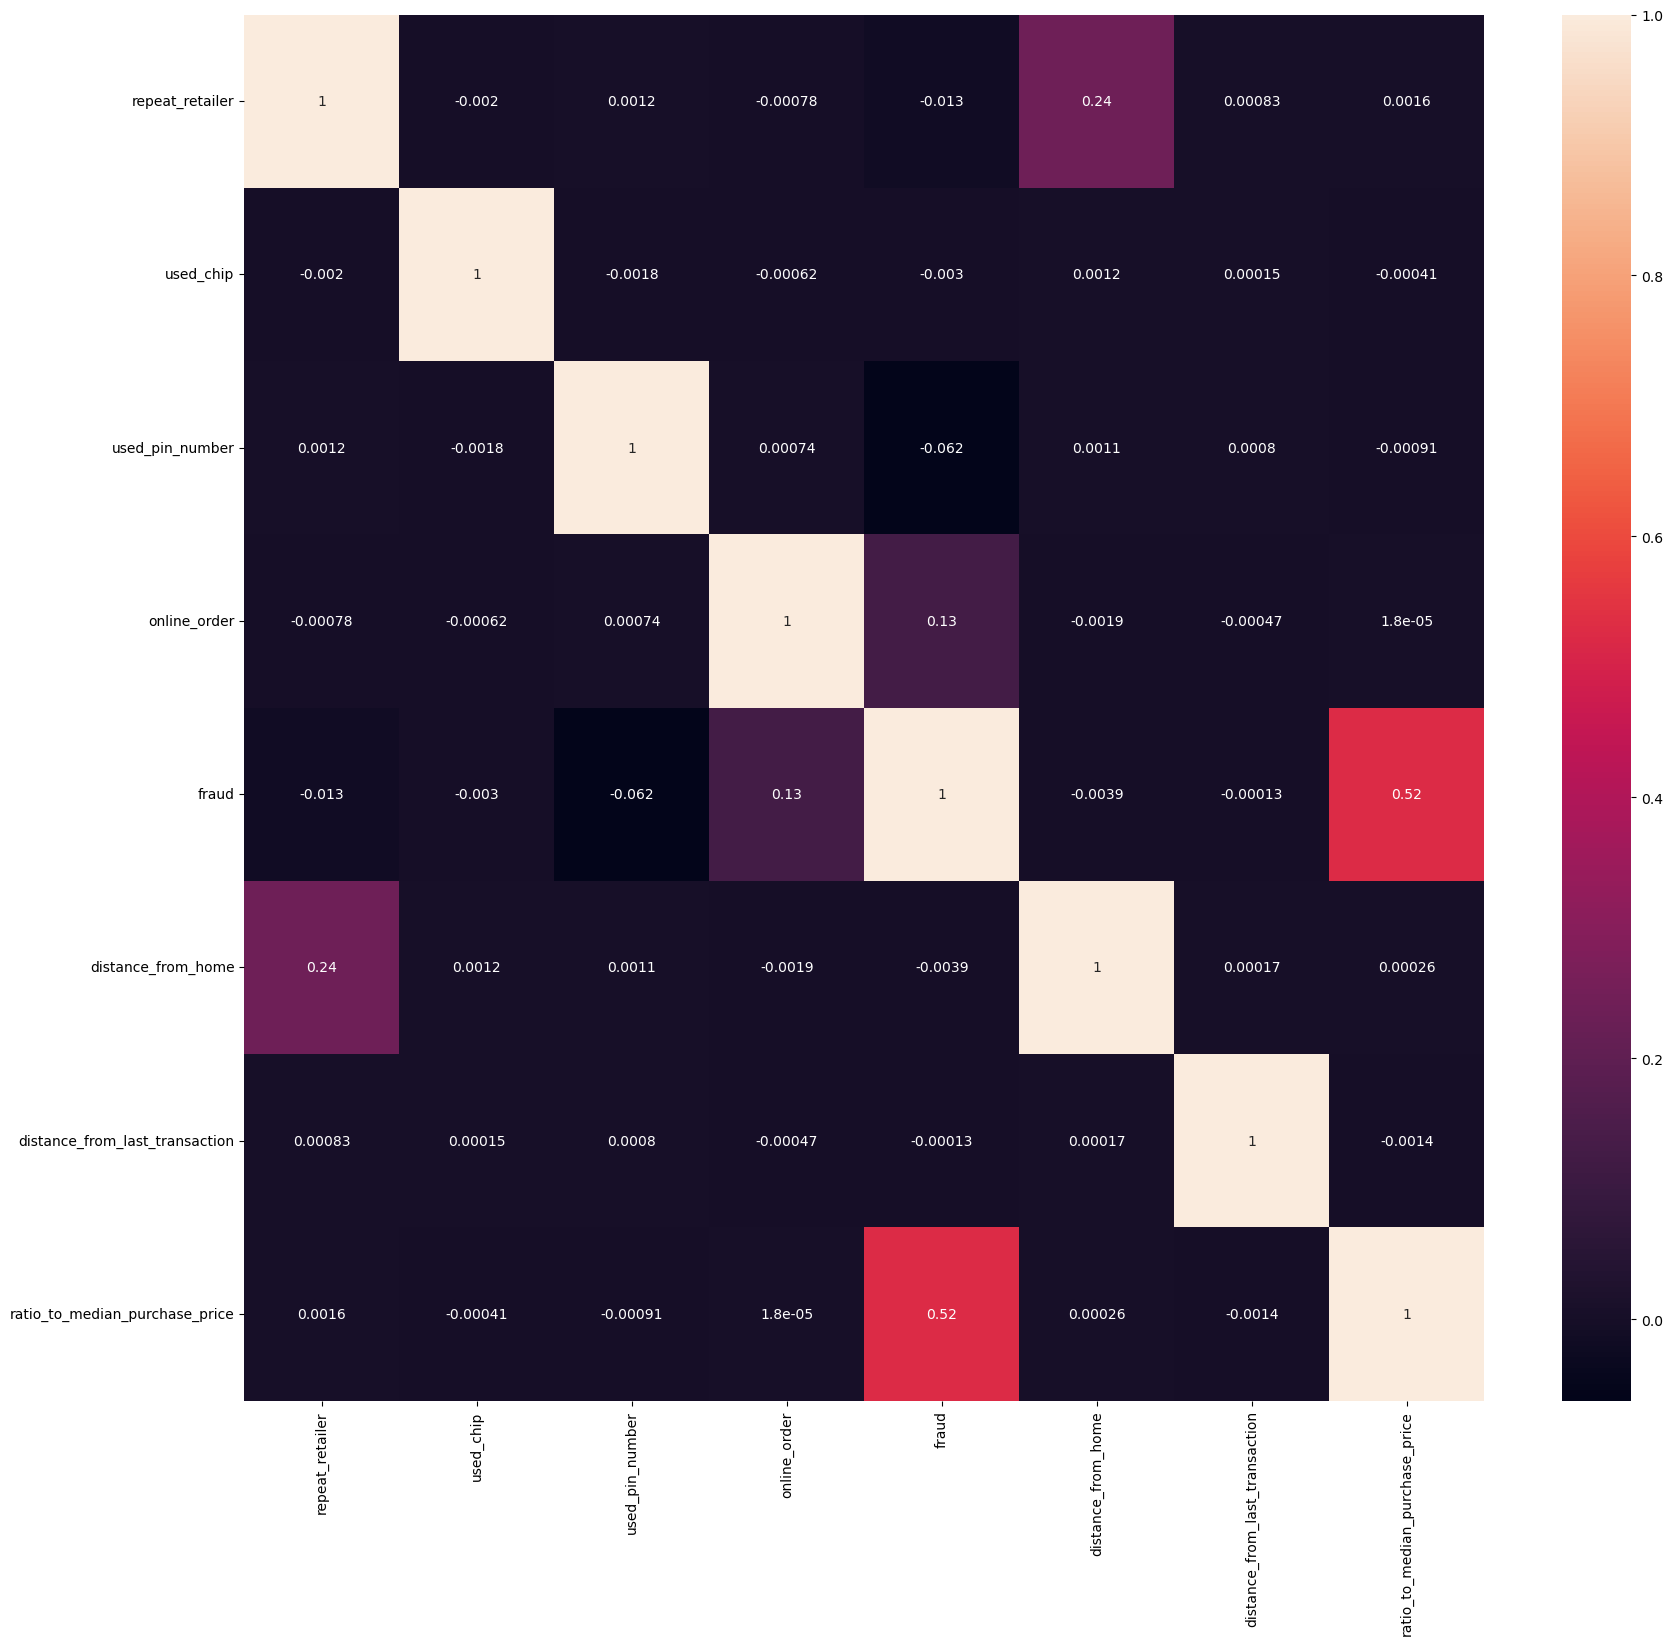

In [186]:
plt.figure(figsize=(20,18))
sns.heatmap(card_concatenated.corr(), annot=True)
plt.show()

## Model Building

In [230]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(card_concatenated.drop(['fraud'],axis=1),card_concatenated['fraud'],test_size=0.3,random_state=100)

In [231]:
x_train.head()

,repeat_retailer,used_chip,used_pin_number,online_order,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
686792,1.0,1.0,0.0,1.0,11.473284,0.557309,0.314186
439820,1.0,0.0,0.0,0.0,34.272944,0.133633,4.270867
688601,1.0,0.0,0.0,0.0,35.364171,0.071576,2.373655
574282,1.0,0.0,0.0,0.0,25.780822,4.485683,1.488529
689288,1.0,0.0,0.0,1.0,30.299012,0.382863,0.354452


In [232]:
x_train.shape

(538739, 7)

## Logistic Regression

In [233]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from  sklearn import metrics

In [234]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\sagar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [235]:
y_pred = logreg.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [236]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix \n",confusion_matrix)

Confusion Matrix 
 [[222968    207]
 [   374   7340]]


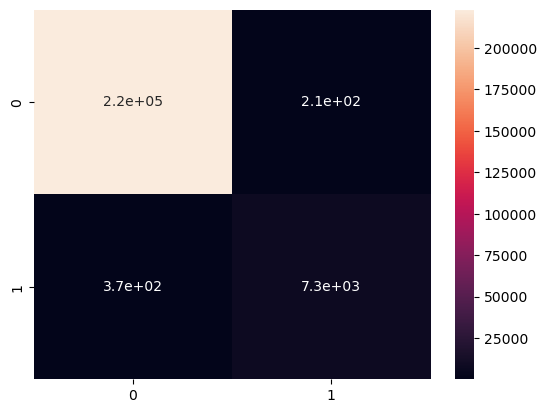

In [237]:
sns.heatmap(confusion_matrix, annot = True)
import matplotlib.pyplot as plt
plt.show()

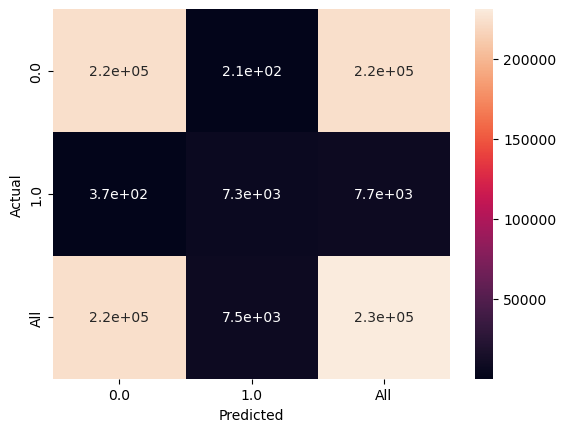

In [238]:
confusion_matrix_new = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)
sns.heatmap(confusion_matrix_new, annot = True)
plt.show()

In [239]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy :",Accuracy)

Overall_Error_Rate = 1-Accuracy
print("Overall_Error_Rate :",Overall_Error_Rate)

Precision = metrics.precision_score(y_test, y_pred)
print("Precision :",Precision)

Sensitivity_recall = metrics.recall_score(y_test, y_pred)
print("Sensitivity Recall :",Sensitivity_recall)

Specificity = metrics.recall_score(y_test, y_pred, pos_label = 0)
print("Specificity :",Specificity)

F1_score = metrics.f1_score(y_test, y_pred)
print("F1 Score :",F1_score)

Accuracy : 0.9974836393245239
Overall_Error_Rate : 0.0025163606754761147
Precision : 0.9725718828673645
Sensitivity Recall : 0.9515167228415867
Specificity : 0.999072476755909
F1 Score : 0.9619291003210799


In [240]:
FPR = 1 - Specificity
FNR = 1 - Sensitivity_recall
print({"False Positive Rate":FPR,"False Negative Rate":FNR})

{'False Positive Rate': 0.0009275232440909553, 'False Negative Rate': 0.048483277158413274}


In [241]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [242]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
# Defining method used for Roc and Auc
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
# Print probability data frame from column 2 which has Index = 1

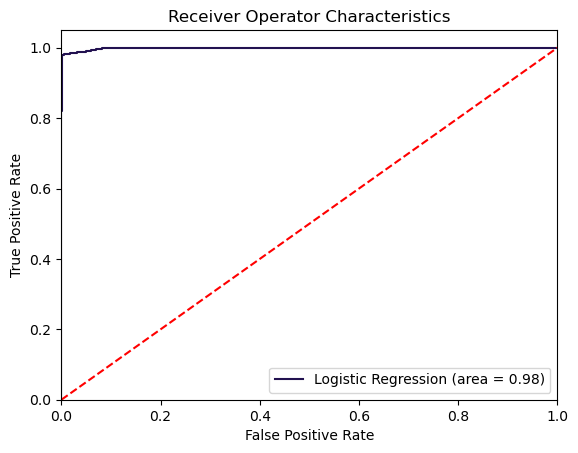

In [243]:
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristics")
plt.legend(loc = "lower right")
# plt.savefig('Plot_Roc') # To save the plot in some object
plt.show()

## Decision Tree

In [244]:
from sklearn import tree
DTCL=tree.DecisionTreeClassifier() 
DTCL.fit(x_train,y_train)

DecisionTreeClassifier()

In [245]:
y_pred1=DTCL.predict(x_test)

In [246]:
import numpy as np
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix is \n', confusion_matrix)

Confusion Matrix is 
 [[223175      0]
 [     2   7712]]


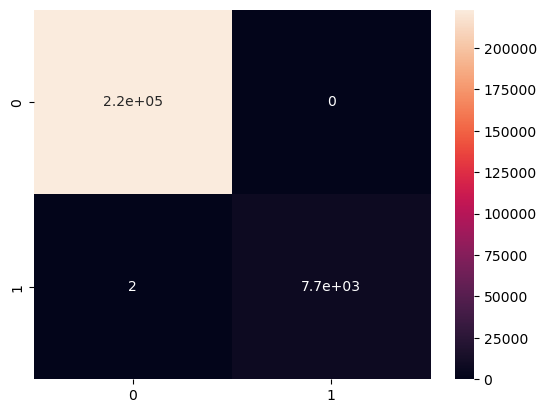

In [247]:
sns.heatmap(confusion_matrix, annot = True)
import matplotlib.pyplot as plt
plt.show()

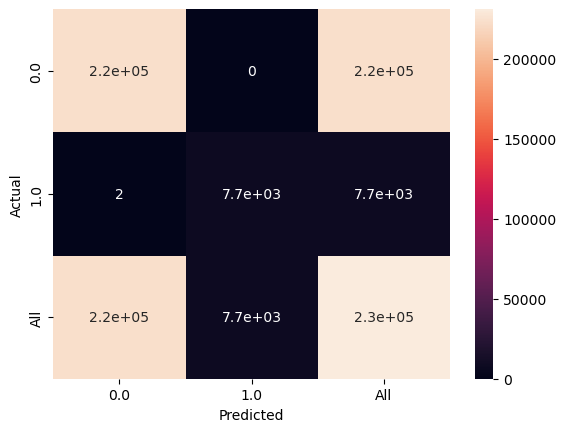

In [248]:
confusion_matrix_new = pd.crosstab(y_test, y_pred1, rownames=['Actual'], colnames=['Predicted'], margins = True)
sns.heatmap(confusion_matrix_new, annot = True)
plt.show()

In [249]:
Accuracy = metrics.accuracy_score(y_test, y_pred1)
print("Accuracy :",Accuracy)

Overall_Error_Rate = 1-Accuracy
print("Overall_Error_Rate :",Overall_Error_Rate)

Precision = metrics.precision_score(y_test, y_pred1)
print("Precision :",Precision)

Sensitivity_recall = metrics.recall_score(y_test, y_pred1)
print("Sensitivity Recall :",Sensitivity_recall)

Specificity = metrics.recall_score(y_test, y_pred1, pos_label = 0)
print("Specificity :",Specificity)

F1_score = metrics.f1_score(y_test, y_pred1)
print("F1 Score :",F1_score)

Accuracy : 0.9999913378290001
Overall_Error_Rate : 8.662170999929053e-06
Precision : 1.0
Sensitivity Recall : 0.9997407311381903
Specificity : 1.0
F1 Score : 0.9998703487618307


In [250]:
FPR = 1 - Specificity
FNR = 1 - Sensitivity_recall
print({"False Positive Rate":FPR,"False Negative Rate":FNR})

{'False Positive Rate': 0.0, 'False Negative Rate': 0.00025926886180971387}


In [251]:
dtcl_roc_auc = roc_auc_score(y_test, DTCL.predict(x_test))
# Defining method used for Roc and Auc
fpr, tpr, thresholds = roc_curve(y_test, DTCL.predict_proba(x_test)[:,1])
# Print probability data frame from column 2 which has Index = 1

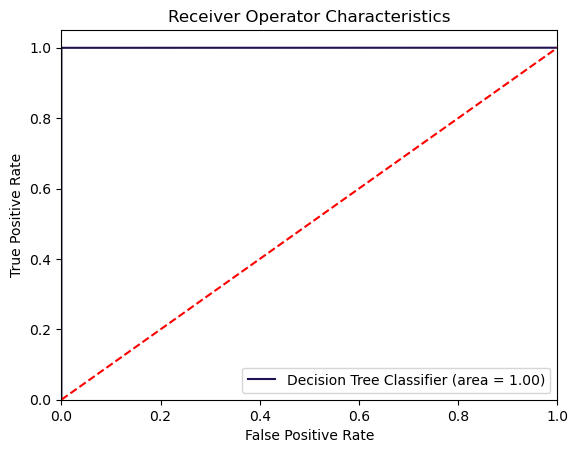

In [252]:
plt.figure()
plt.plot(fpr, tpr, label = 'Decision Tree Classifier (area = %0.2f)' %dtcl_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristics")
plt.legend(loc = "lower right")
## plt.savefig('Plot_Roc') # To save the plot in some object
plt.show()

In [253]:
X=card_concatenated.drop(['fraud'],axis=1)
y=card_concatenated['fraud']
X.head()

,repeat_retailer,used_chip,used_pin_number,online_order,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
0,1.0,1.0,0.0,0.0,57.877857,0.311140,1.945940
1,1.0,0.0,0.0,0.0,10.829943,0.175592,1.294219
2,1.0,0.0,0.0,1.0,5.091079,0.805153,0.427715
3,1.0,1.0,0.0,1.0,2.247564,5.600044,0.362663
4,1.0,1.0,0.0,1.0,44.190936,0.566486,2.222767


[Text(0.5, 0.9166666666666666, 'ratio_to_median_purchase_price <= 4.0\ngini = 0.065\nsamples = 769628\nvalue = [743773, 25855]'),
 Text(0.4, 0.75, 'gini = 0.0\nsamples = 726462\nvalue = [726462, 0]'),
 Text(0.6, 0.75, 'online_order <= 0.5\ngini = 0.48\nsamples = 43166\nvalue = [17311, 25855]'),
 Text(0.4, 0.5833333333333334, 'repeat_retailer <= 0.5\ngini = 0.078\nsamples = 15135\nvalue = [14523, 612]'),
 Text(0.3, 0.4166666666666667, 'used_chip <= 0.5\ngini = 0.494\nsamples = 1104\nvalue = [492, 612]'),
 Text(0.2, 0.25, 'used_pin_number <= 0.5\ngini = 0.176\nsamples = 678\nvalue = [66, 612]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 612\nvalue = [0, 612]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 66\nvalue = [66, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 426\nvalue = [426, 0]'),
 Text(0.5, 0.4166666666666667, 'gini = 0.0\nsamples = 14031\nvalue = [14031, 0]'),
 Text(0.8, 0.5833333333333334, 'used_pin_number <= 0.5\ngini = 0.179\nsamples = 28031\nvalue 

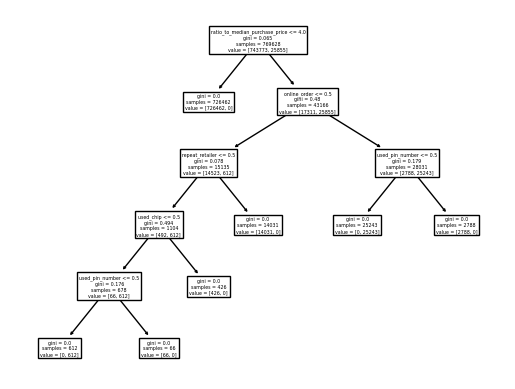

In [254]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X,y)

tree.plot_tree(dtree, feature_names=X.columns)

In [255]:
import os 
os.environ['PATH']  = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [256]:
import graphviz

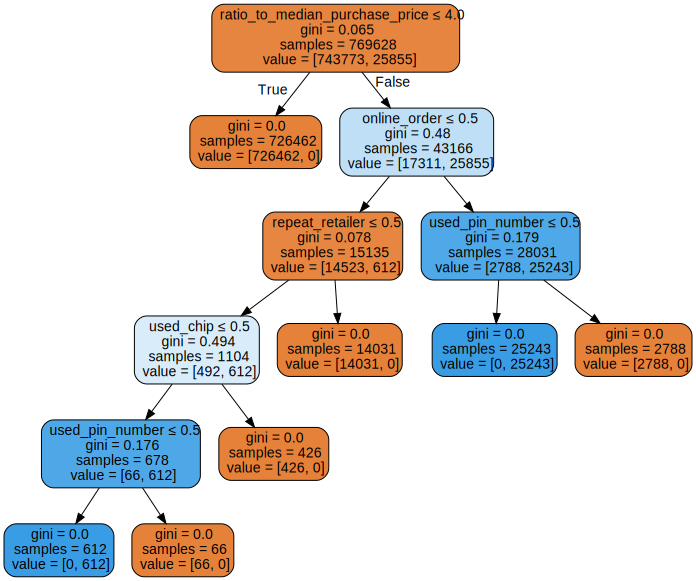

In [257]:
dot_data = tree.export_graphviz(dtree, out_file=None, feature_names=X.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
graph.render('dtr_ccfraud')

## Random Forest Classifier

In [258]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

In [259]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [260]:
y_pred_RFC=RFC.predict(x_test)

In [261]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_RFC)
print('Confusion Matrix is \n', confusion_matrix)

Confusion Matrix is 
 [[223175      0]
 [     0   7714]]


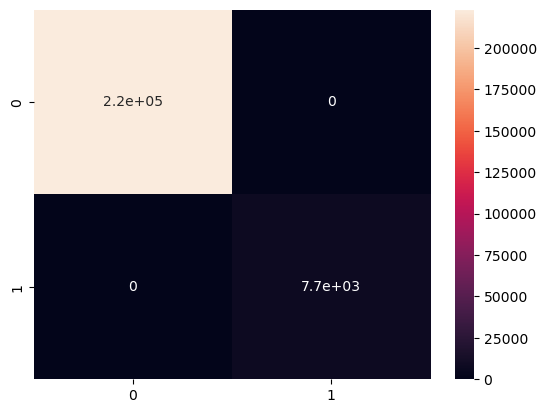

In [262]:
sns.heatmap(confusion_matrix, annot = True)
import matplotlib.pyplot as plt
plt.show()

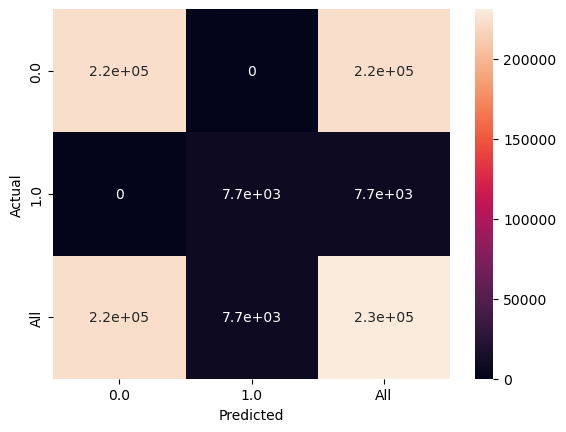

In [263]:
confusion_matrix_new = pd.crosstab(y_test, y_pred_RFC, rownames=['Actual'], colnames=['Predicted'], margins = True)
sns.heatmap(confusion_matrix_new, annot = True)
plt.show()

In [264]:
Accuracy = metrics.accuracy_score(y_test, y_pred_RFC)
print("Accuracy :",Accuracy)

Overall_Error_Rate = 1-Accuracy
print("Overall_Error_Rate :",Overall_Error_Rate)

Precision = metrics.precision_score(y_test, y_pred_RFC)
print("Precision :",Precision)

Sensitivity_recall = metrics.recall_score(y_test, y_pred_RFC)
print("Sensitivity Recall :",Sensitivity_recall)

Specificity = metrics.recall_score(y_test, y_pred_RFC, pos_label = 0)
print("Specificity :",Specificity)

F1_score = metrics.f1_score(y_test, y_pred_RFC)
print("F1 Score :",F1_score)

Accuracy : 1.0
Overall_Error_Rate : 0.0
Precision : 1.0
Sensitivity Recall : 1.0
Specificity : 1.0
F1 Score : 1.0


In [265]:
FPR = 1 - Specificity
FNR = 1 - Sensitivity_recall
print({"False Positive Rate":FPR,"False Negative Rate":FNR})

{'False Positive Rate': 0.0, 'False Negative Rate': 0.0}


In [266]:
rfc_roc_auc = roc_auc_score(y_test, RFC.predict(x_test))
# Defining method used for Roc and Auc
fpr, tpr, thresholds = roc_curve(y_test, RFC.predict_proba(x_test)[:,1])
# Print probability data frame from column 2 which has Index = 1

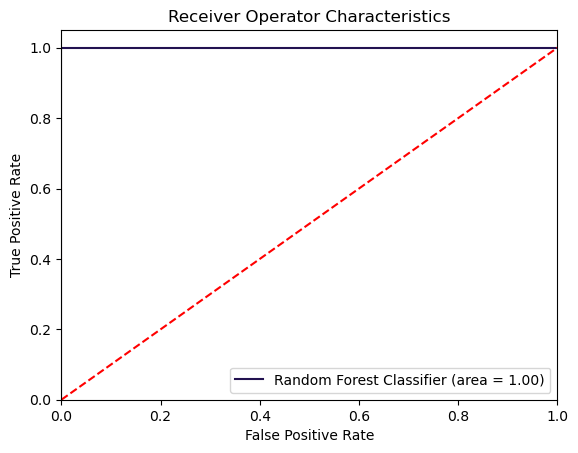

In [267]:
plt.figure()
plt.plot(fpr, tpr, label = 'Random Forest Classifier (area = %0.2f)' %rfc_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operator Characteristics")
plt.legend(loc = "lower right")
## plt.savefig('Plot_Roc') # To save the plot in some object
plt.show()

All three models perform exceptionally well in terms of Accuracy, Overall Error Rate, Precision, Sensitivity, Specificity, F1 Score, and ROC AUC. However, Decision Tree Classifier and Random Forest Classifier achieve perfect accuracy (1.0), while Logistic Regression has a slightly lower accuracy (0.9975).

The Decision Tree Classifier and Random Forest Classifier have perfect Specificity and very high Sensitivity, indicating that they are excellent at distinguishing both positive and negative cases.

Logistic Regression performs well but has slightly lower Sensitivity and Specificity compared to the Decision Tree and Random Forest.

The F1 Score, which balances Precision and Sensitivity, is also highest for the Decision Tree and Random Forest models.

Based on these evaluation metrics, both the Decision Tree Classifier and Random Forest Classifier works best.